### CONTEXT 

Project is a computer vision project that involves deep learning model: CNN to correctly classify vehicle into emergency or Non-emergency vehicles 

In [1]:
#pip install opencv-python

In [2]:
# libary needed for this analysis
 
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator  
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

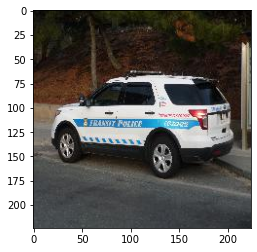

In [3]:
train_dir = r'C:\Users\User 1\image\train' # training directory
test_dir = r'C:\Users\User 1\image\test' # testing directory


# load the first image
image = cv2.imread(r'C:\Users\User 1\image\train\1.jpg') 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converts to RGB

# show the image
plt.imshow(image)


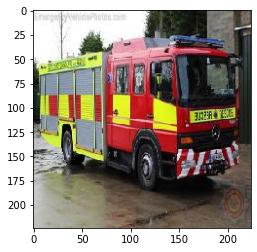

In [4]:
# load the second image
image2 = cv2.imread(r'C:\Users\User 1\image\train\3.jpg') 
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB) # converts to RGB

# show the image
plt.imshow(image2)

In [5]:
image.shape # shape of the image object 1

(224, 224, 3)

In [6]:
image2.shape # shape of the image object 2

(224, 224, 3)

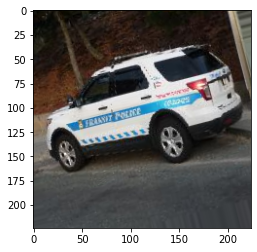

In [7]:
#  using image generator to process the image
ImgGenerator = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.20,
                                    zoom_range=0.20,fill_mode='nearest',horizontal_flip=True,rescale=1/255)



plt.imshow(ImgGenerator.random_transform(image)) # transforming of the image

In [8]:
# training data of the image
train_frame=pd.read_csv('train.csv')
# testing data of the image
test_frame=pd.read_csv('test.csv') 

# first ten rows of the train data
train_frame.head(10)

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
5,45.jpg,1
6,2313.jpg,0
7,1657.jpg,0
8,294.jpg,1
9,999.jpg,0


In [9]:
#shape of training
train_frame.shape

(1646, 2)

In [10]:
# changes the emergency_or_not column in the train data to a str
train_frame['emergency_or_not']=train_frame['emergency_or_not'].astype(str)

In [11]:
# inspects the training data
train_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [12]:
# specify the data used for training, the path directory , name of images, name of directories and target size
train_gen =ImgGenerator.flow_from_dataframe(dataframe=train_frame[:1150],directory=train_dir,x_col='image_names',
                                              y_col='emergency_or_not',class_mode='binary',target_size=(224,224),
                                              batch_size=50)

validation_gen =ImgGenerator.flow_from_dataframe(dataframe=train_frame[1150:],directory=train_dir,
                                                 x_col='image_names',y_col='emergency_or_not',class_mode='binary',
                                                 target_size=(224,224),batch_size=50) 

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


## 3 layer Conv2D

In [13]:
# building 3layers Conv2D
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


In [14]:
# compilation of the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 32)       0

In [15]:
history=model.fit(train_gen,epochs = 10,validation_data = validation_gen) # train the model to learn

Epoch 1/10
23/23 [==============================] - 75s 3s/step - loss: 0.7067 - accuracy: 0.5670 - val_loss: 0.6224 - val_accuracy: 0.7379
Epoch 2/10
23/23 [==============================] - 74s 3s/step - loss: 0.6077 - accuracy: 0.7235 - val_loss: 0.5423 - val_accuracy: 0.7681
Epoch 3/10
23/23 [==============================] - 68s 3s/step - loss: 0.5652 - accuracy: 0.7287 - val_loss: 0.4823 - val_accuracy: 0.7540
Epoch 4/10
23/23 [==============================] - 67s 3s/step - loss: 0.5595 - accuracy: 0.7339 - val_loss: 0.4673 - val_accuracy: 0.7863
Epoch 5/10
23/23 [==============================] - 68s 3s/step - loss: 0.5235 - accuracy: 0.7574 - val_loss: 0.4686 - val_accuracy: 0.7722
Epoch 6/10
23/23 [==============================] - 77s 3s/step - loss: 0.5088 - accuracy: 0.7583 - val_loss: 0.4529 - val_accuracy: 0.7762
Epoch 7/10
23/23 [==============================] - 79s 3s/step - loss: 0.5120 - accuracy: 0.7583 - val_loss: 0.4541 - val_accuracy: 0.7802
Epoch 8/10
23/23 [==

### 3 Conv2D layer - Training and validation accuracy

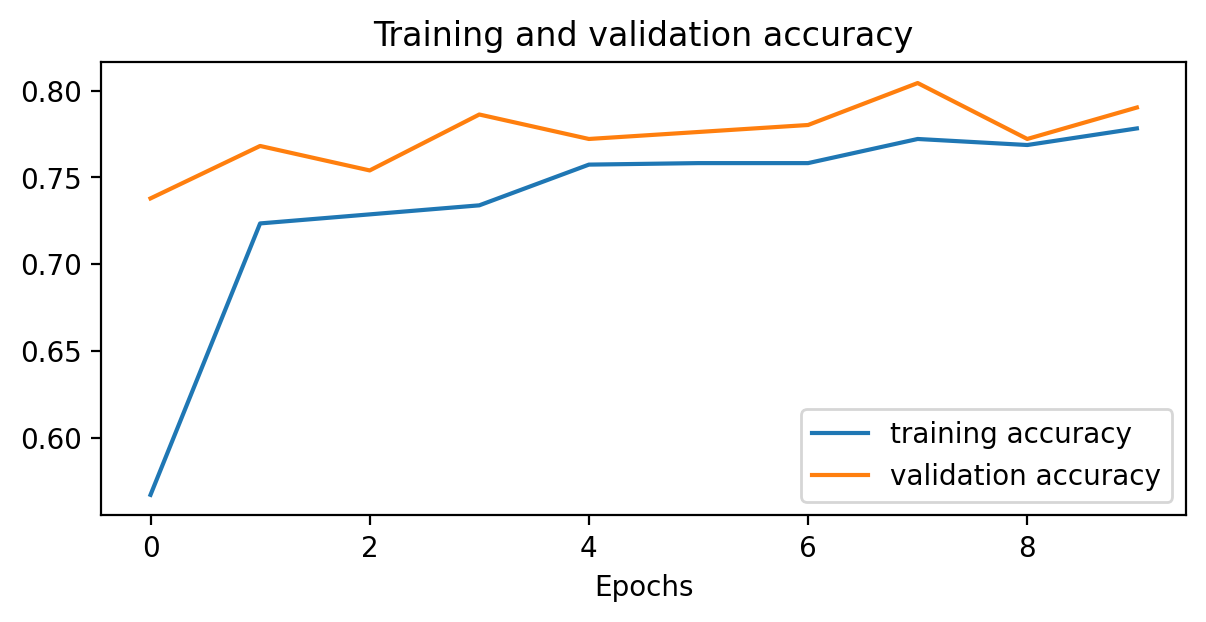

In [16]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (7,3))
plt.plot(history_df['accuracy'],label='training accuracy')
plt.plot(history_df['val_accuracy'],label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### 3 Conv2D layer - Training and validation loss

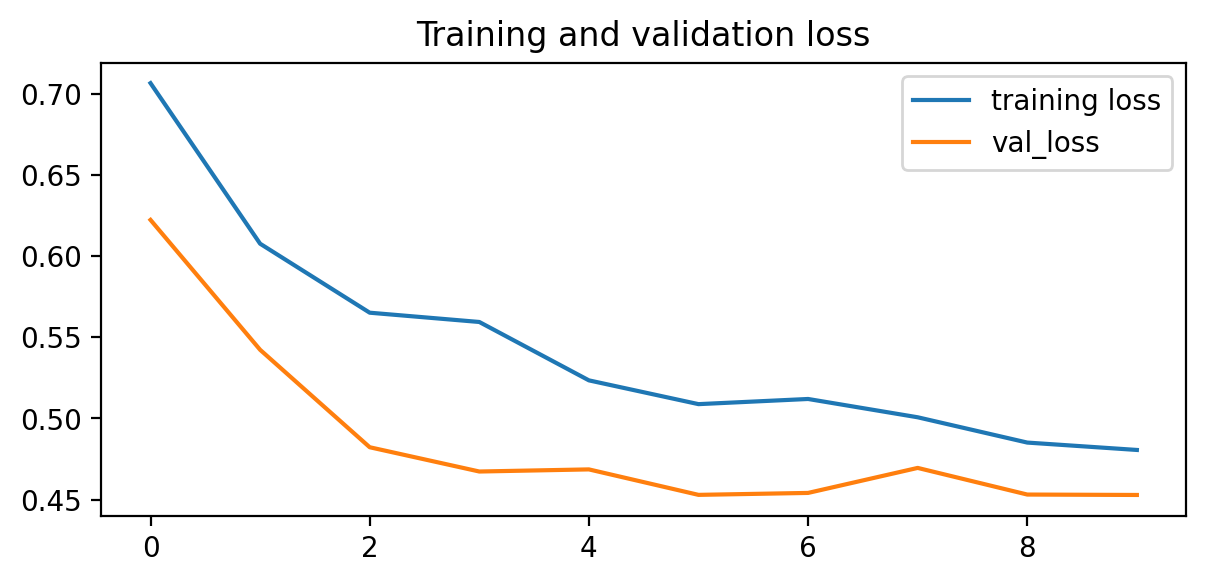

In [17]:
history_df2 = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (7,3))
plt.plot(history_df2['loss'],label='training loss')
plt.plot(history_df2['val_loss'],label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 6 Conv2D Layer

In [18]:
# building 6layers Conv2D
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


In [19]:
# compilation of the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 32)      

### 6 Conv2D layer - Training and validation accuracy

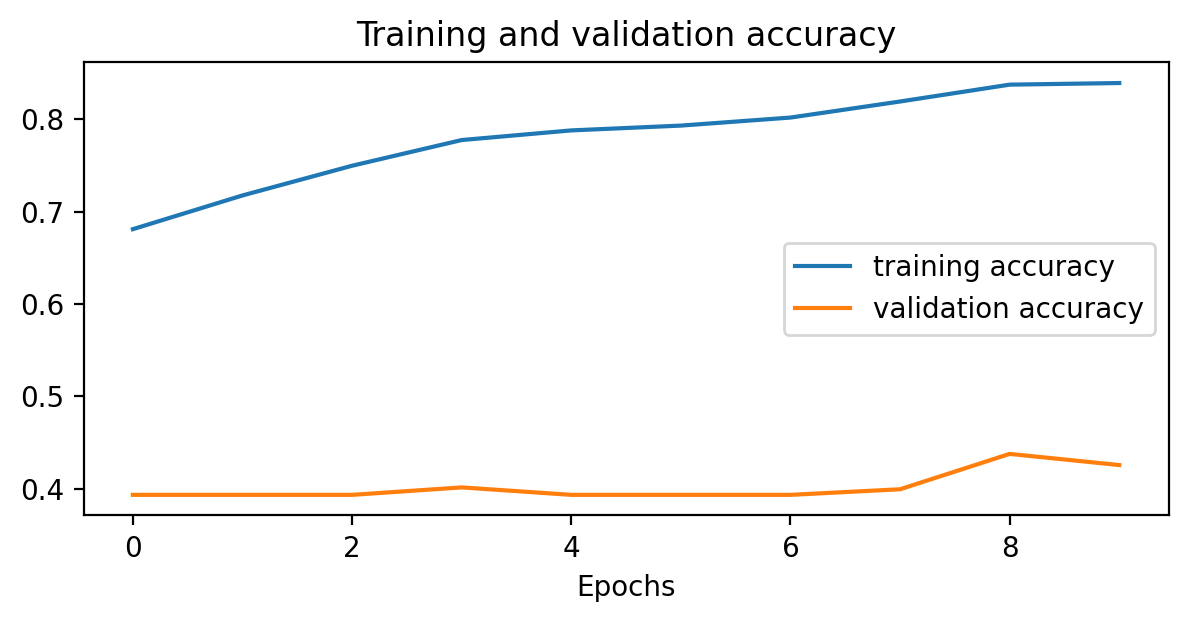

In [21]:
history_df3 = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (7,3))
plt.plot(history_df3['accuracy'],label='training accuracy')
plt.plot(history_df3['val_accuracy'],label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### 6 Conv2D layer - Training and validation loss

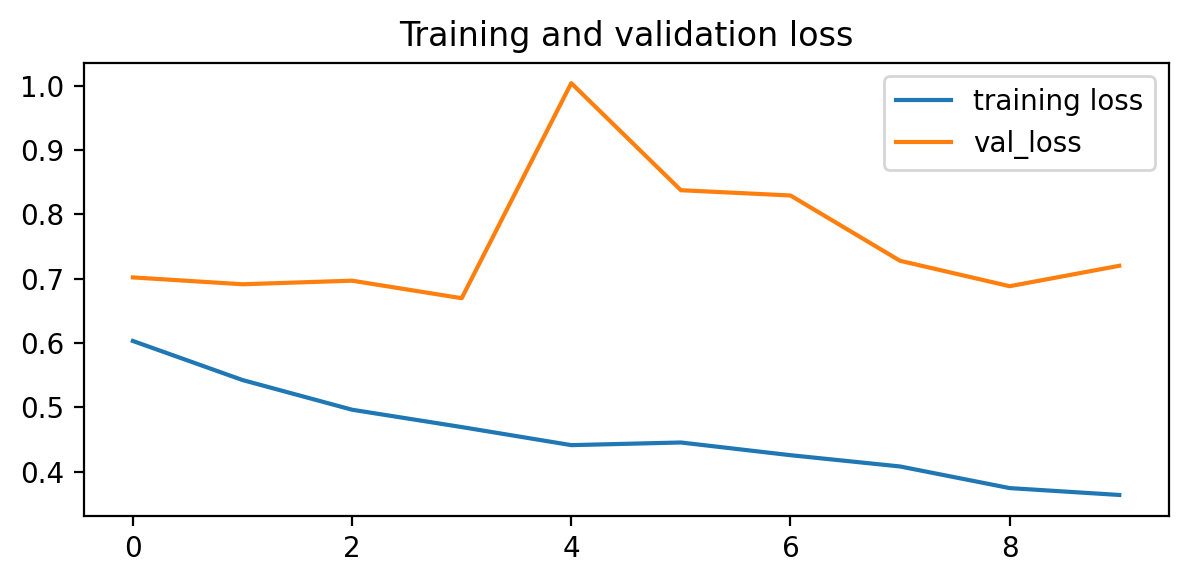

In [22]:
history_df4 = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (7,3))
plt.plot(history_df4['loss'],label='training loss')
plt.plot(history_df4['val_loss'],label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()